#***Classification***

##Random_Forest_Classifier

In [ ]:
#libraries required for the model
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,roc_auc_score
import matplotlib.pyplot as plt



['setosa' 'versicolor' 'virginica']
0.7333333333333333


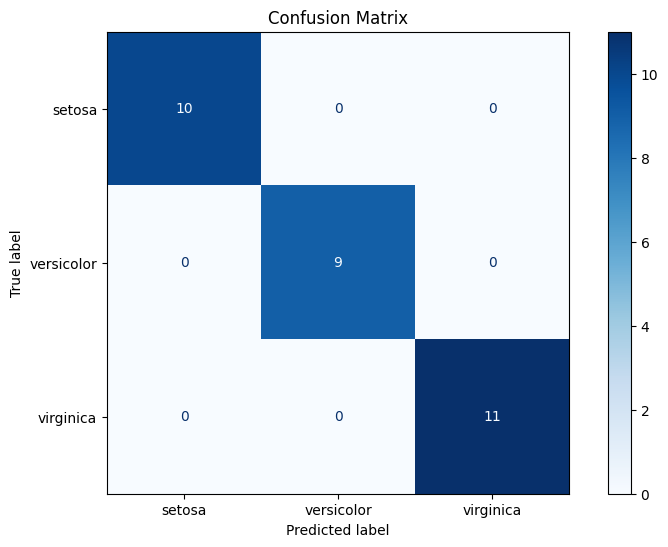

In [ ]:
data = load_iris()
random_x = data.data
random_y = data.target
rx_train,rx_test,ry_train,ry_test = train_test_split(random_x,random_y,train_size=0.8,random_state=42)
print(data.target_names)
RC_model = RandomForestClassifier()
RC_model.fit(rx_train,ry_train)
ry_predict= RC_model.predict(rx_test)
cf = confusion_matrix(ry_test,ry_predict)
df = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = data.target_names)
print(accuracy_score(ry_test,ry_predict))
fig,ax = plt.subplots(figsize=(10,6))
df.plot(ax = ax,cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



##Linear_Regression

In [ ]:
#libraries required for the model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

[1 0 2 1 1 0 1 1 1 1 1 0 0 0 0 1 2 1 1 1 0 1 0 1 1 1 1 2 0 0]
0.9468960016420045
0.7333333333333333


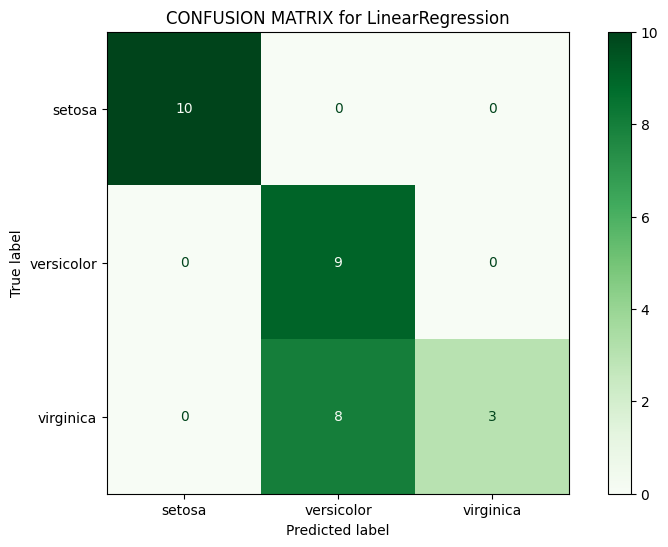

In [ ]:
data = load_iris()
lr_x = data.data
lr_y = data.target

lx_train,lx_test,ly_train,ly_test = train_test_split(lr_x,lr_y,train_size=0.8,random_state=42)
LR = LinearRegression()
LR.fit(lx_train,ly_train)
ly_predict = LR.predict(lx_test).astype('int64')
print(y_predict)
print(LR.score(lx_test,ly_test))
print(accuracy_score(ly_test,ly_predict))

cf = confusion_matrix(ly_test,y_predict)
df = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = data.target_names)
fig,ax = plt.subplots(figsize=(10,6))
df.plot(ax=ax,cmap = plt.cm.Greens)
plt.title("CONFUSION MATRIX for LinearRegression")
plt.show()

##K_Nearest_Neighbor

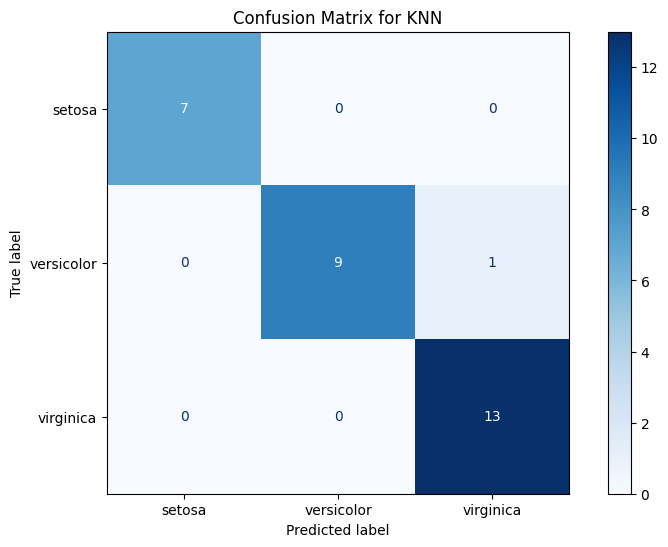

[[0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,roc_auc_score
import matplotlib.pyplot as plt

data = load_iris()
knn_x = data.data
knn_y = data.target
kx_train,kx_test,ky_train,ky_test = train_test_split(knn_x,knn_y,train_size=0.8)
neighbor_model = KNeighborsClassifier(n_neighbors=3)
neighbor_model.fit(kx_train,ky_train)
ky_predict = neighbor_model.predict(kx_test)
cm = confusion_matrix(ky_test,ky_predict)
cmd = ConfusionMatrixDisplay(confusion_matrix =cm,display_labels = data.target_names)
fig,ax = plt.subplots(figsize=(10,6))
cmd.plot(ax=ax,cmap =plt.cm.Blues)
plt.title("Confusion Matrix for KNN")
plt.show()
print(neighbor_model.predict_proba(x_test).astype('int'))


##SVM(Support Vector Machine)

In [ ]:
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,roc_auc_score
import matplotlib.pyplot as plt

##Plotting ROC and AUC curve

In [ ]:
from sklearn.metrics import roc_curve,auc
lr_fpr,lr_tpr, threshold = roc_curve(ly_test,ly_predict)
auc_random = roc_curve(lr_fpr,lr_tpr)

knn_fpr,knn_tpr, threshold = roc_curve(ky_test,ky_predict)
auc_knn = roc_curve(knn_fpr,knn_tpr)

plt.figure(figsize=(10,6))
plt.plot(lr_fpr,lr_tpr,label = 'random forest classifier (auc = %0.3f)' % auc_random)
plt.plot(knn_fpr,knn_tpr,label = 'KNN (auc = %0.3f)' % auc_knn)

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.show()

ValueError: multiclass format is not supported

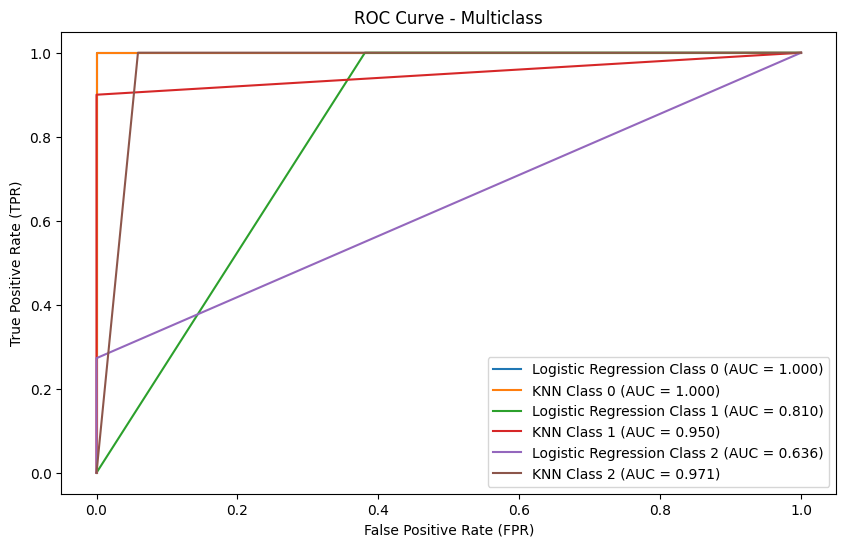

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass
n_classes = len(set(ly_test))  # number of unique classes

ly_test_bin = label_binarize(ly_test, classes=[i for i in range(n_classes)])
ly_predict_bin = label_binarize(ly_predict, classes=[i for i in range(n_classes)])

ky_test_bin = label_binarize(ky_test, classes=[i for i in range(n_classes)])
ky_predict_bin = label_binarize(ky_predict, classes=[i for i in range(n_classes)])

# Compute ROC curve and ROC area for each class for logistic regression
lr_fpr = dict()
lr_tpr = dict()
roc_auc_lr = dict()

for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(ly_test_bin[:, i], ly_predict_bin[:, i])
    roc_auc_lr[i] = auc(lr_fpr[i], lr_tpr[i])

# Compute ROC curve and ROC area for each class for KNN
knn_fpr = dict()
knn_tpr = dict()
roc_auc_knn = dict()

for i in range(n_classes):
    knn_fpr[i], knn_tpr[i], _ = roc_curve(ky_test_bin[:, i], ky_predict_bin[:, i])
    roc_auc_knn[i] = auc(knn_fpr[i], knn_tpr[i])

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(lr_fpr[i], lr_tpr[i], label='Logistic Regression Class %d (AUC = %0.3f)' % (i, roc_auc_lr[i]))
    plt.plot(knn_fpr[i], knn_tpr[i], label='KNN Class %d (AUC = %0.3f)' % (i, roc_auc_knn[i]))

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()
